In [53]:
# Step 1

class Multinomial_NB: 
    
    def _init_(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, Y):
        self.row, self.column = X.shape
        self.c, self.cCount = np.unique(Y, return_counts=True)
        numberOfClass = len(self.c)    
        numberTerms = len(np.unique(X[:, 2]))

        # Find prior
        self.prior = np.zeros(numberOfClass)
        for i, c in enumerate(self.c):
            numberSample = X[np.where(Y == c)]
            self.prior[i] = ((numberSample.shape[0] + self.alpha) / (numberOfClass * self.alpha + self.row))

        # Find likelihood
        self.likelihood = {i:{} for i in range(self.column)}
        for j in range(self.column):
            for c in range(numberOfClass):
                feature, featureCounts = np.unique(X[np.where(Y == c), j], return_counts=True)
                probabilityArray = (featureCounts + self.alpha) / (numberTerms * self.alpha + self.cCount[c])
                dictionary = {feature[k]: probabilityArray[k] for k in range(len(feature))}
                self.likelihood[j][self.c[c]] = dictionary
              
    def predict(self, X):
        return self.predict_log_proba(X)
                
    def predict_log_proba(self, X):
        maximum = 0
        label = None
        posterior = []
        row, column = X.shape
        
        for i in range(row):
#             maximum = 0
#             label = None
            for j in range(len(self.prior)):
                log_prior = np.log(self.prior[j])
                normalize = 1
                for k in range(column):
                    status = self.likelihood[k][j].get(X[i, k])
                    # if status is NONE
                    if status:
                        normalize *= status
                log_posterior = log_prior * np.log(normalize)

                if log_posterior > maximum:
                    maximum = log_posterior
                    label = j
            posterior.append(label)
                
        return posterior
    
    def predict_proba(self, X):
        return pow(2, self.predict_log_proba(X))

In [42]:
# Step 2

import pandas as pd

df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','sms_message'])
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
# Step 3

df['length'] = df['sms_message'].map(lambda text: len(text))

df.groupby('label').length.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,71.482487,58.440652,2.0,33.0,52.0,93.0,910.0
spam,747.0,138.670683,28.873603,13.0,133.0,149.0,157.0,223.0


In [44]:
# Step 3

df['label'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,sms_message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


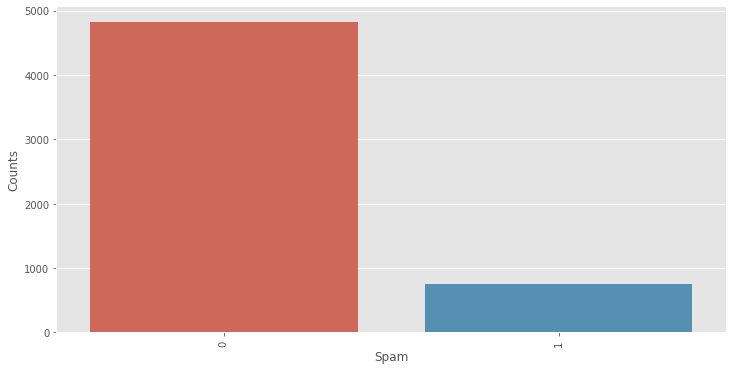

In [45]:
# Step 4
# 0 ham, 1 spam

import seaborn as sns
import matplotlib.pyplot as plt
 
label_counts = df.label.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Spam', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [ ]:
#Step 5

In [47]:
%%time
# import ssl
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

import nltk
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['text_lemmatized'] = df['sms_message'].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text.lower())))

[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>


CPU times: user 1.68 s, sys: 18.7 ms, total: 1.7 s
Wall time: 1.78 s


In [48]:
print(df['sms_message'][2])
print("\nLemmatized Email:\n")
print(df['text_lemmatized'][2])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Lemmatized Email:

free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question ( std txt rate ) t & c 's apply 08452810075over18 's


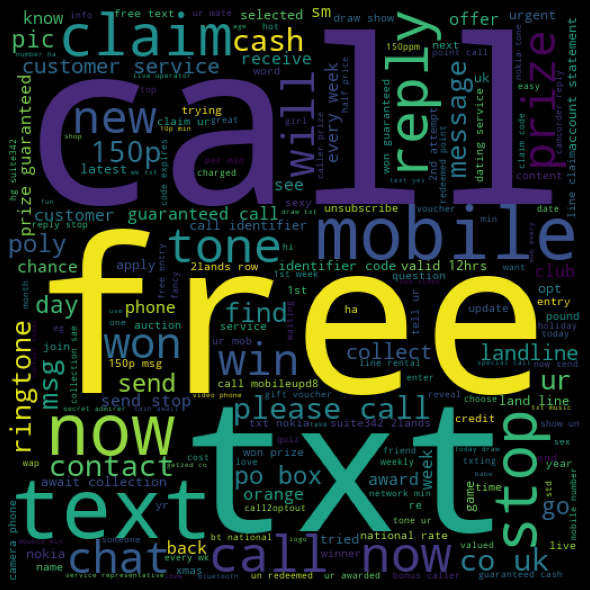

In [23]:
#Step 6
from wordcloud import WordCloud

#for spam messages
spam_words = ''.join(list(df[df['label']==1]['text_lemmatized']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

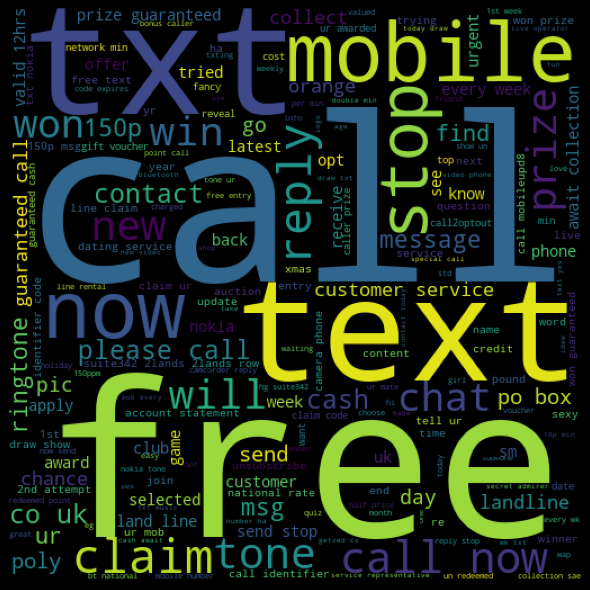

In [10]:
#Step 6

from wordcloud import WordCloud

#for spam messages
spam_words = ''.join(list(df[df['label']==1]['text_lemmatized']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [49]:
# Step 7
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

documents = df['text_lemmatized']

count_vect = CountVectorizer(lowercase=True, stop_words='english')
document_counts = count_vect.fit_transform(documents)

documents = np.array(documents)

# print("\nFeature Names:")
# print(count_vect.get_feature_names())

# print("\nVocabulary: ", count_vect.vocabulary_)


print("\nCount Vector Matrix (Dense Matrix):")
print(document_counts.toarray())

print(document_counts.shape)


Count Vector Matrix (Dense Matrix):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5572, 7935)


In [50]:
# Step 8

X = df['text_lemmatized']
y = df['label']

print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [51]:
# Step 9
df = df.sample(frac=1) 
df.head()

,label,sms_message,length,text_lemmatized
4355,1,important information 4 orange user 0789xxxxxx...,163,important information 4 orange user 0789xxxxxx...
3205,0,She's good. How are you. Where r u working now,46,she 's good . how are you . where r u working now
3075,0,Don know. I did't msg him recently.,35,don know . i did't msg him recently .
4562,0,Good afternoon my boytoy. How goes that walkin...,156,good afternoon my boytoy . how go that walking...
3050,0,Lol they don't know about my awesome phone. I ...,85,lol they do n't know about my awesome phone . ...


In [12]:
#Step 10

# Splitting the data into Train Set and Test Set
def partition(X,y,t):
    x_train = np.array(X[int((len(X)+1)*t):])
    x_test = np.array(X[:int((len(X)+1)*t)])
    y_train = np.array(y[int((len(y)+1)*t):])
    y_test = np.array(y[:int((len(y)+1)*t)]) 
    return x_train, x_test, y_train, y_test

#separate the target vector and features
def separateTargetVector(dataSet):
    y = dataSet['label'] #target vector
    X = dataSet.drop(columns='label') #features matrix
    t = 0.2
    return X,y,t

#a function to split data into partition
#according to the number of folds
def partitionSplit(df, folds):
    s_partition = []
    dfCopy = df
    #set the size for each partiton
    eachPartition = int(df.shape[0] / folds)
    for i in range(folds):
        partition = []
        #going through each partition
        for j in range(eachPartition):
            if(len(partition) < eachPartition):
                value = dfCopy.index[0]
                partition.append(value.tolist())
                dfCopy = dfCopy.drop(value)
        s_partition.append((np.asarray(partition)).tolist())
  
    return s_partition


In [13]:
# Functions for Part D

# Returns the Accuracy
def accuracy(predicted, actual):
    accuracy = sum(np.array(predicted) == np.array(actual)) / float(len(actual))
    return accuracy

# Calculates Precision Values when inputs are TP and FP 
# that are based upon the probability and threshold
def precisions(tp, fp):
    score = []
    for i in range(len(tp)):
        precision = tp[i] / (tp[i] + fp[i])
        i += 1
        score.append(precision)
    return score

# Calculates Recall Values when inputs are TP and FN 
# that are based upon the probability and threshold
def recalls(tp, fn):
    score = []
    for i in range(len(tp)):
        recall = tp[i] / (tp[i] + fn[i])
        i += 1
        score.append(recall)
    return score


# Calculates Precision Score when input arguments are Test Labels and the 
# predicted labels
def precisionScore(yTest, yPredict):
    tp = sum((np.array(yTest) == 1) & (np.array(yPredict) == 1))
    fp = sum((np.array(yTest) == 0) & (np.array(yPredict) == 1))
    score = tp/(tp+fp)
    return score

# Calculates Recall Score when input arguments are Test Labels and the 
# predicted labels
def recallScore(yTest, yPredict):
    tp = sum((np.array(yTest) == 1) & (np.array(yPredict) == 1))
    fn = sum((np.array(yTest) == 1) & (np.array(yPredict) == 0))
    score = tp/(tp+fn)
    return score

# Calculates F1 Score when input arguments are Test Labels and the 
# predicted labels
def f1_score(yTest, yPredict):
    tp = sum((np.array(yTest) == 1) & (np.array(yPredict) == 1))
    fn = sum((np.array(yTest) == 1) & (np.array(yPredict) == 0))
    fp = sum((np.array(yTest) == 0) & (np.array(yPredict) == 1))
    score = tp / (tp + ((fn + fp) / 2))
    return score

# Generates the Confusion Matrix
def confusionMatrix(actual, predicted):
    confusionLists = np.unique(actual)
    matrixSize = len(confusionLists)
    matrix = np.zeros((matrixSize, matrixSize))
    for i in range (matrixSize):
        for j in range (matrixSize):
            matrix[i, j] = np.sum((actual == confusionLists[i]) & (predicted == confusionLists[j]))
    return matrix

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

# Generates the ROC Curve

def roc_curve(yTest, probability, label=None):
    fprList = []
    tprList = []
    
    thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    fpValues = []
    fnValues = []
    tpValues = []
    tnValues = []

    # Getting a new array of predictions based on the thresholds and the
    # array of probabilities of "1: Good Wine" in KNN
    for j in range(len(thresholds)):
        newValues = []
        for i in range(len(probability)):
            if (probability[i] < thresholds[j]):
                newValues.append(0)
            else:
                newValues.append(1)
        for k in range(len(newValues)):
        
            tp = sum((np.array(yTest) == 1) & (np.array(newValues) == 1))
            fn = sum((np.array(yTest) == 1) & (np.array(newValues) == 0))
            fp = sum((np.array(yTest) == 0) & (np.array(newValues) == 1))
            tn = sum((np.array(yTest) == 0) & (np.array(newValues) == 0))

        tpValues.append(tp)
        fnValues.append(fn)
        fpValues.append(fp)
        tnValues.append(tn)

    for i in range(len(fpValues)):
        fpr = fpValues[i]/(fpValues[i]+tnValues[i]) #False Positive Rate
        tpr = tpValues[i]/(tpValues[i]+fnValues[i]) #True Positive Rate
        
        #put point by point into list
        fprList.append(fpr)
        tprList.append(tpr)
        
    print(fprList)
    print(tprList)
    
    #Plotting
    fig = plt.figure(figsize=(10, 6))
    plt.plot(fprList, tprList, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()


# Generates the AUC values
def AUC(yTest, probability):
    fprList = []
    tprList = []
    
    thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    fpValues = []
    fnValues = []
    tpValues = []
    tnValues = []

    # Getting a new array of predictions based on the thresholds and the
    # array of probabilities of "1: Good Wine" in KNN
    for j in range(len(thresholds)):
        newValues = []
        for i in range(len(probability)):
            if (probability[i] < thresholds[j]):
                newValues.append(0)
            else:
                newValues.append(1)
        for k in range(len(newValues)):
            tp = sum((np.array(yTest) == 1) & (np.array(newValues) == 1))
            fn = sum((np.array(yTest) == 1) & (np.array(newValues) == 0))
            fp = sum((np.array(yTest) == 0) & (np.array(newValues) == 1))
            tn = sum((np.array(yTest) == 0) & (np.array(newValues) == 0))

        tpValues.append(tp)
        fnValues.append(fn)
        fpValues.append(fp)
        tnValues.append(tn)

    for i in range(len(fpValues)):     
        fpr = fpValues[i]/(fpValues[i]+tnValues[i])
        tpr = tpValues[i]/(tpValues[i]+fnValues[i])
        #put point by point into list
        fprList.append(fpr)
        tprList.append(tpr)

    fprList = np.flip(fprList)
    tprList = np.flip(tprList)
    
    auc = np.trapz(tprList, fprList)
    
    return auc

In [14]:
#Step 11

def sFold(folds, data, labels, model, error_function, dictionary): 
    avgF1Score = [] 
    splitX = partitionSplit(data, folds)

    #loop to choose a partition as validation set
    for i, partition in enumerate(splitX):
        trainSet = list(splitX)
        del(trainSet[i])       #dropping the validation set
        trainSet = sum(trainSet, [])

        testSet = []           #getting the validation set 
        for row in partition:
            testSet.append(row)  #put data in validation set into a new list 
            
        #splitting the data into train and test set
        xTrainValues = []
        yTrainValues = []        
        for trainIndex in trainSet:
            xTrainValues.append(data.loc[trainIndex])
            yTrainValues.append(labels.loc[trainIndex])

        #splitting the validation set data into train and test set
        xTestValues = []
        yTestValues = []
        for testIndex in testSet:
            xTestValues.append(data.loc[testIndex])
            yTestValues.append(labels.loc[testIndex])
    
        #preform prediction using KNN
        if model == 'Multinomial_NB':
            modelClassifier = Multinomial_NB()
            modelClassifier._init_(alpha=dictionary.get('alpha'))
            modelClassifier.fit(np.array(xTrainValues), np.array(yTrainValues))
            yPredict = modelClassifier.predict(np.array(xTestValues))
            accuracy_value = accuracy(yPredict, np.array(yTestValues))
            print('Accuracy: %.3f' %accuracy_value)
            
            #calculating the error using f1 score
            if error_function == 'f1':
                error = f1_score(np.array(yTestValues), yPredict)
                avgF1Score.append(error)
            
            print('F1 Score: %.3f' %error)
            print('\n')
      
    #get the average f1 score for the current k
    avgFinalF1Score = sum(avgF1Score) / len(avgF1Score) 
    print(avgFinalF1Score) 
    print('\n')

    return {'expected labels': yTestValues, 'predicted labels': yPredict, 'errors': [error]}

In [54]:
#get the X data(features without target) and y data(target column)
X,y,t = separateTargetVector(df)

#function to pass the hyperparameter into s-fold validation
def dictionary(alpha):
    modelArgs = dict()
    #form the dictionary
    for eachAlpha in alpha:
        modelArgs = {'alpha': eachAlpha}
        #use of s-folds
        out = sFold(5, X, y, 'Multinomial_NB', 'f1', modelArgs)

alpha = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 1.5, 2.0]

dictionary(alpha)

Accuracy: 0.136
F1 Score: 0.239


Accuracy: 0.139
F1 Score: 0.243


Accuracy: 0.128
F1 Score: 0.226


Accuracy: 0.142
F1 Score: 0.247


Accuracy: 0.128
F1 Score: 0.228


0.23657877418673726


Accuracy: 0.136
F1 Score: 0.239


Accuracy: 0.139
F1 Score: 0.243


Accuracy: 0.128
F1 Score: 0.226


Accuracy: 0.142
F1 Score: 0.247


Accuracy: 0.128
F1 Score: 0.228


0.23657877418673726




KeyboardInterrupt: 

In [228]:
#Step 12

X,y,t = separateTargetVector(df)
xTrain, xTest, yTrain, yTest = partition(X, y, t)
modelClassifier = Multinomial_NB()
modelClassifier._init_(alpha=1.5)
modelClassifier.fit(np.array(xTrain), np.array(yTrain))
yPredict = modelClassifier.predict(np.array(xTest))
yPredict = np.array(yPredict)

# # Plot the ROC Curve
# print("ROC_curve:")
# roc_curve(yTest, probability)
# print("\n")

# # Get the AUC Value
# print("AUC_curve:")
# auc = AUC(yTest, probability)
# print("AUC: %f" %auc)
# print("\n")

[0.00024644 0.00024644 0.00024644 ... 0.00024644 0.00024644 0.00024644]
[0.00024644 0.00024644 0.00034501 0.00024644 0.00024644 0.00024644
 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644
 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644
 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644
 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644
 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644
 0.00024644 0.00024644 0.00024644 0.00034501 0.00024644 0.00024644
 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644
 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644
 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644
 0.00034501 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644
 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644
 0.00024644 0.00024644 0.00034501 0.00024644 0.00024644 0.00024644
 0.00024644 0.00024644 0.00024644 0.00024644 0.00024644 0

IndexError: index 2 is out of bounds for axis 0 with size 2

In [116]:
# Step 13

print('Precision:', precisionScore(yTest, yPredict))
print('Recall:', recallScore(yTest, yPredict))
print('F1 score:', f1_score(yTest, yPredict))
print('Accuracy:', accurary(yTest, yPredict))
print('Confusion Matrix:', confusionMatrix(yTest, yPredict))
print("\n")

Precision: 0.592391304347826
Recall: 0.6687116564417178
F1 score: 0.6282420749279539
Accuracy: 0.8842010771992819
Confusion Matrix: [[876.  75.]
 [ 54. 109.]]


